<a href="https://colab.research.google.com/github/Skuerjuan/tp1_chona/blob/main/maierowicz_atanasoff_gallo_ABD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 Seminario IA
# Maierowicz, Atanasoff, Gallo
---
## ¿Deberían aceptar darle el préstamo?

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
# importando la data y creando el pd.dataframe
data = "https://raw.githubusercontent.com/Skuerjuan/tp1_chona/refs/heads/main/loan_data.csv"
df = pd.read_csv(data)
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [76]:

df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [77]:
# ver todas las columnas que habría que encodear

categorical = ["person_gender", "person_education", "person_home_ownership", "loan_intent", "previous_loan_defaults_on_file"]

for col in categorical:
    print(col, df[col].unique())

person_gender ['female' 'male']
person_education ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
person_home_ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
previous_loan_defaults_on_file ['No' 'Yes']


In [78]:
# Split data sin categoricals

from sklearn.model_selection import train_test_split

df_cont = df.drop(columns=categorical)
y = df["loan_status"]
x = df_cont.drop(columns=["loan_status"])

# y_train & y_test son lo mismo con y sin categoricals
x_train_cont, x_test_cont, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Accuracy: 0.841

Precision: 0.6908371786420567

Recall: 0.5213930348258706



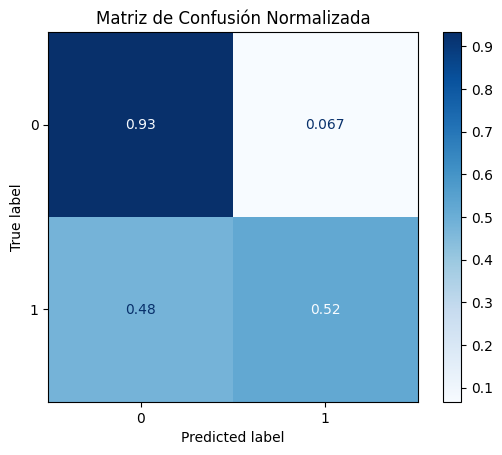

In [79]:
# Modelo de árbol con df_cont

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay

dtc_cont = DecisionTreeClassifier(max_depth=4, criterion="log_loss")
dtc_cont.fit(x_train_cont, y_train)

y_pred = dtc_cont.predict(x_test_cont)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
print(f'Precision: {precision_score(y_test, y_pred)}\n')
print(f'Recall: {recall_score(y_test, y_pred)}\n')

disp = ConfusionMatrixDisplay.from_estimator(
    dtc_cont,
    x_test_cont,
    y_test,
    cmap=plt.cm.Blues,
    normalize="true",
  )
disp.ax_.set_title("Matriz de Confusión Normalizada")

plt.show()

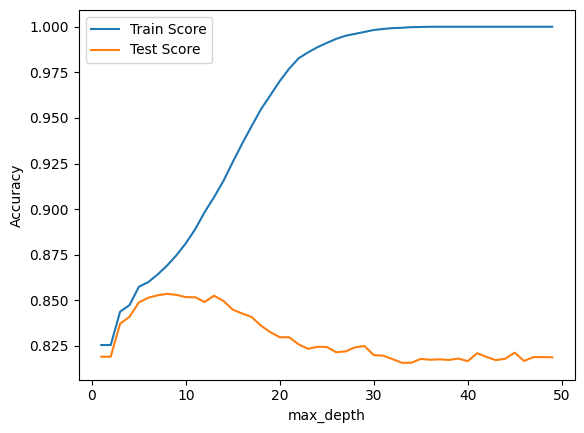

In [89]:
# DTC con df_cont, gráfico de max_depth

max_depths = range(1, 50)
train_scores = []
test_scores = []
for max_depth in max_depths:
    arbol = DecisionTreeClassifier(max_depth=max_depth, criterion="entropy")
    arbol.fit(x_train_cont, y_train)
    train_scores.append(arbol.score(x_train_cont, y_train))
    test_scores.append(arbol.score(x_test_cont, y_test))
plt.plot(max_depths, train_scores, label='Train Score')
plt.plot(max_depths, test_scores, label='Test Score')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Accuracy: 0.8244444444444444

Precision: 0.6782752902155887

Recall: 0.40696517412935324



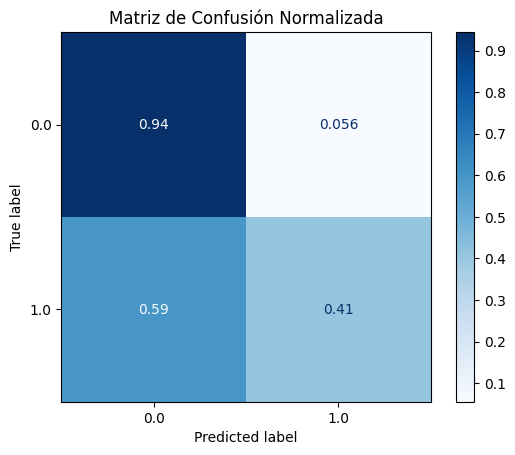

In [93]:
#Modelo de Regresión Logística con df_cont

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # Escalando los datos para que el line search algorithm converja (?)
x_train_cont = scaler.fit_transform(x_train_cont)
x_test_cont = scaler.transform(x_test_cont)

lr_cont = LogisticRegression(solver="newton-cg", max_iter=200)
lr_cont.fit(x_train_cont, y_train)

y_pred = lr_cont.predict(x_test_cont)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
print(f'Precision: {precision_score(y_test, y_pred)}\n')
print(f'Recall: {recall_score(y_test, y_pred)}\n')

disp = ConfusionMatrixDisplay.from_estimator(
    lr_cont,
    x_test_cont,
    y_test,
    cmap=plt.cm.Blues,
    normalize="true",
  )
disp.ax_.set_title("Matriz de Confusión Normalizada")

plt.show()

In [81]:
# encoding de todas las features categóricas

from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[("cat", OneHotEncoder(), categorical)], remainder="passthrough")

x = ct.fit_transform(df)

feature_names = ct.get_feature_names_out()

df = pd.DataFrame(x, columns=feature_names)
df.head()

,cat__person_gender_female,cat__person_gender_male,cat__person_education_Associate,cat__person_education_Bachelor,cat__person_education_Doctorate,cat__person_education_High School,cat__person_education_Master,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__previous_loan_defaults_on_file_Yes,remainder__person_age,remainder__person_income,remainder__person_emp_exp,remainder__loan_amnt,remainder__loan_int_rate,remainder__loan_percent_income,remainder__cb_person_cred_hist_length,remainder__credit_score,remainder__loan_status
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,22.0,71948.0,0.0,35000.0,16.02,0.49,3.0,561.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,21.0,12282.0,0.0,1000.0,11.14,0.08,2.0,504.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,25.0,12438.0,3.0,5500.0,12.87,0.44,3.0,635.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,23.0,79753.0,0.0,35000.0,15.23,0.44,2.0,675.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,24.0,66135.0,1.0,35000.0,14.27,0.53,4.0,586.0,1.0


In [82]:
for col in df.columns:
    print("- ", col)

-  cat__person_gender_female
-  cat__person_gender_male
-  cat__person_education_Associate
-  cat__person_education_Bachelor
-  cat__person_education_Doctorate
-  cat__person_education_High School
-  cat__person_education_Master
-  cat__person_home_ownership_MORTGAGE
-  cat__person_home_ownership_OTHER
-  cat__person_home_ownership_OWN
-  cat__person_home_ownership_RENT
-  cat__loan_intent_DEBTCONSOLIDATION
-  cat__loan_intent_EDUCATION
-  cat__loan_intent_HOMEIMPROVEMENT
-  cat__loan_intent_MEDICAL
-  cat__loan_intent_PERSONAL
-  cat__loan_intent_VENTURE
-  cat__previous_loan_defaults_on_file_No
-  cat__previous_loan_defaults_on_file_Yes
-  remainder__person_age
-  remainder__person_income
-  remainder__person_emp_exp
-  remainder__loan_amnt
-  remainder__loan_int_rate
-  remainder__loan_percent_income
-  remainder__cb_person_cred_hist_length
-  remainder__credit_score
-  remainder__loan_status


In [83]:
# Split del dataset con todas las features

y = df["remainder__loan_status"]
x = df.drop(columns=["remainder__loan_status"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Mejores hiperparámetros encontrados: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 2}
Accuracy: 0.918

Precision: 0.8822115384615384

Recall: 0.7303482587064677



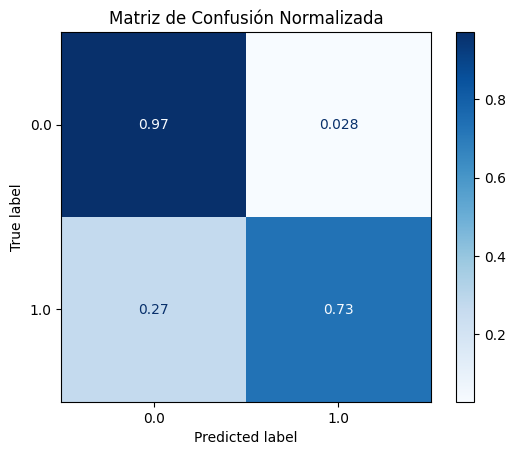

In [86]:
# Modelo de árbol con todas las features

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

param_grid = { # Parametros que buscaremos optimizar
    'max_depth': range(1, 10),
    "min_samples_leaf": range(1, 3),
    "criterion": ["gini", "entropy", "log_loss"]
}

dtc = DecisionTreeClassifier(max_depth=4, criterion="log_loss", min_samples_leaf=2)
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid,
                           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                           scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train, y_train)

print("Mejores hiperparámetros encontrados:", grid_search.best_params_)

y_pred = grid_search.predict(x_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
print(f'Precision: {precision_score(y_test, y_pred)}\n')
print(f'Recall: {recall_score(y_test, y_pred)}\n')

disp = ConfusionMatrixDisplay.from_estimator(
    grid_search,
    x_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize="true",
  )
disp.ax_.set_title("Matriz de Confusión Normalizada")

plt.show()

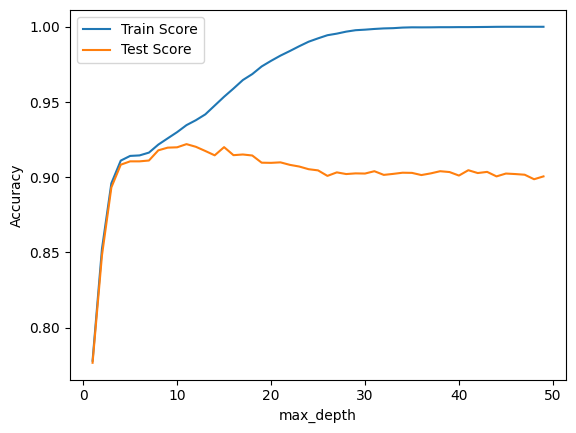

In [88]:
# DTC con todas las features, gráfico de max_depth

max_depths = range(1, 50)
train_scores = []
test_scores = []
for max_depth in max_depths:
    arbol = DecisionTreeClassifier(max_depth=max_depth, criterion="entropy")
    arbol.fit(x_train, y_train)
    train_scores.append(arbol.score(x_train, y_train))
    test_scores.append(arbol.score(x_test, y_test))
plt.plot(max_depths, train_scores, label='Train Score')
plt.plot(max_depths, test_scores, label='Test Score')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Accuracy: 0.8931111111111111

Precision: 0.7729166666666667

Recall: 0.7383084577114428



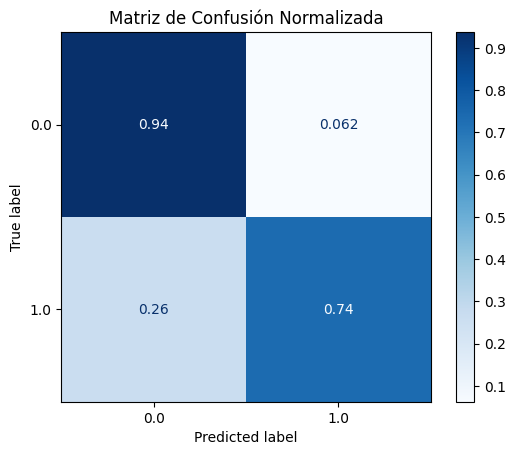

In [87]:
# Modelo de regresión lineal con todas las features

lr = LogisticRegression(solver="newton-cg", max_iter=200)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
print(f'Precision: {precision_score(y_test, y_pred)}\n')
print(f'Recall: {recall_score(y_test, y_pred)}\n')

disp = ConfusionMatrixDisplay.from_estimator(
    lr,
    x_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize="true",
  )
disp.ax_.set_title("Matriz de Confusión Normalizada")

plt.show()

Mejores hiperparámetros encontrados: {'max_depth': 9, 'min_samples_leaf': 2}
Accuracy: 0.922

Precision: 0.8997555012224939

Recall: 0.7323383084577114



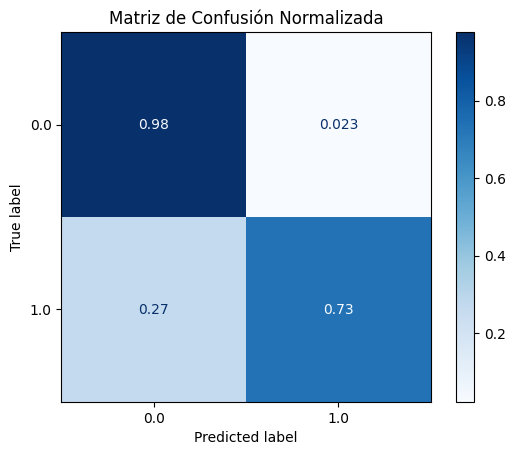

In [91]:
# Intentando mejorar el modelo con RandomForest

from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': range(5, 10),
    "min_samples_leaf": range(1, 3)
}

rfc = RandomForestClassifier(max_depth=4, criterion="log_loss", min_samples_leaf=2)
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid,
                           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                           scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train, y_train)

print("Mejores hiperparámetros encontrados:", grid_search.best_params_)

y_pred = grid_search.predict(x_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
print(f'Precision: {precision_score(y_test, y_pred)}\n')
print(f'Recall: {recall_score(y_test, y_pred)}\n')

disp = ConfusionMatrixDisplay.from_estimator(
    grid_search,
    x_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize="true",
  )
disp.ax_.set_title("Matriz de Confusión Normalizada")

plt.show()